In [33]:
import os, datetime
import numpy as np 
import pandas as pd 


import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers



In [36]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
data = pd.read_csv('./datasets/life_expectancy.csv')
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2486,Suriname,2002,Developing,67.9,221.0,0,4.41,250.711237,NaN,0,...,74.0,7.14,73.0,1.6,2232.513244,48344.0,3.5,3.5,0.000,11.0
2161,Rwanda,2005,Developing,55.3,37.0,24,7.01,39.446667,95.0,129,...,95.0,6.83,95.0,7.1,287.931877,8991735.0,6.8,7.0,0.388,8.8
311,Bolivia (Plurinational State of),2008,Developing,67.4,211.0,10,3.77,0.000000,88.0,0,...,87.0,5.00,88.0,0.2,NaN,NaN,1.3,1.1,0.632,14.0
1952,Pakistan,2005,Developing,62.9,2.0,364,0.04,30.593208,7.0,2981,...,78.0,2.91,77.0,0.1,711.469946,15399667.0,21.2,21.7,0.487,6.1
1335,Jordan,2010,Developing,73.4,117.0,4,0.51,715.970909,98.0,0,...,98.0,8.42,98.0,0.1,3679.192750,718239.0,3.8,3.8,0.739,13.2


In [3]:
data.shape

(2938, 22)

In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data.columns.to_numpy()

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [6]:
countries = data['Country'].unique()

na_cols = ['Life expectancy ',
'Adult Mortality',
'Alcohol',
'Hepatitis B',
' BMI ',
'Polio',
'Total expenditure',
'Diphtheria ',
'GDP',
' thinness  1-19 years',
' thinness 5-9 years',
'Population',
'Income composition of resources']

for col in na_cols:
        for country in countries:
            data.loc[data['Country']==country,col] = data.loc[data['Country'] == country,col].fillna(data[data['Country'] == country][col].mean())


In [7]:
data.isna().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data = data.dropna()
data.shape

(2128, 22)

In [9]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [10]:
data['Country'].value_counts()

Afghanistan          16
Mozambique           16
Poland               16
Philippines          16
Peru                 16
                     ..
Eritrea              16
Equatorial Guinea    16
El Salvador          16
Ecuador              16
Zimbabwe             16
Name: Country, Length: 133, dtype: int64

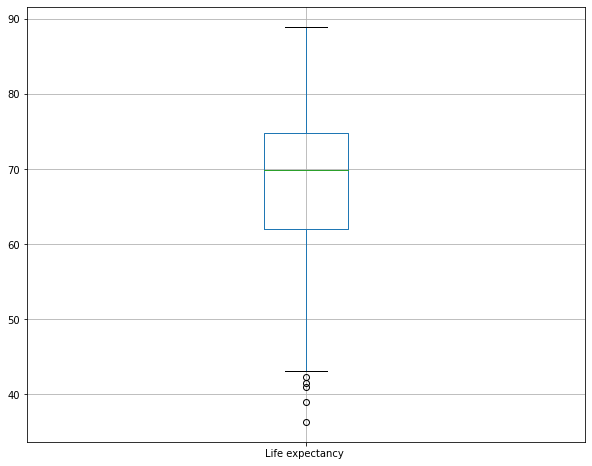

In [11]:
plt.figure(figsize=(10,8))
data.boxplot('Life expectancy ')
plt.show()

/home/hz/.virtualenvs/ml-gym/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


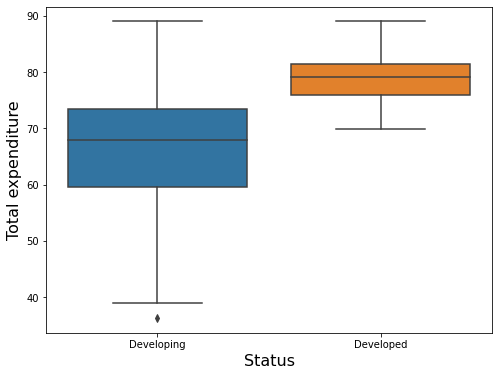

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot('Status', 'Life expectancy ', data= data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [13]:
data['Status'].unique()


array(['Developing', 'Developed'], dtype=object)

/home/hz/.virtualenvs/ml-gym/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


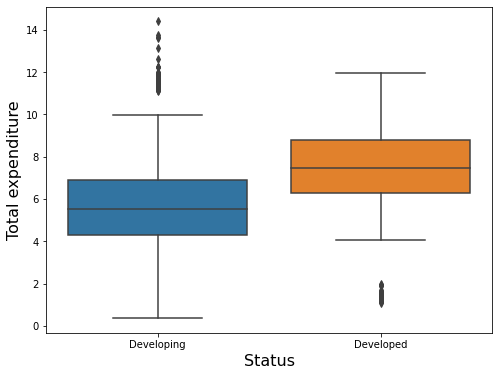

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot('Status','Total expenditure',data=data)
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)
plt.show()

In [15]:
data_corr = data[['Life expectancy ',
'Adult Mortality',
'Schooling',
'Total expenditure',
'Diphtheria ',
'GDP',
'Population']].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


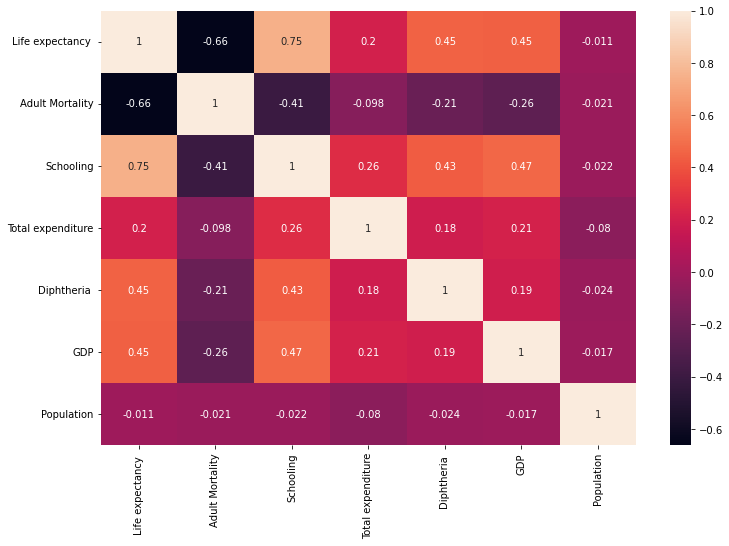

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data_corr,annot=True)
plt.show()

In [17]:
features = data.drop('Life expectancy ', axis=1)
target = data[['Life expectancy ']]


In [18]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
target.sample(5)

,Life expectancy
1283,82.5
1647,78.2
324,76.9
1894,53.6
269,68.5


In [20]:
 features = features.drop('Country', axis=1)


In [21]:
 features.columns
 

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
categorical_features= features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [23]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
numeric_features = features.drop(['Status'],axis=1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
numeric_features.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [26]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
columns=numeric_features.columns,
index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [27]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(processed_features, target, test_size=0.2,
random_state = 1)

In [29]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32,
    input_shape=(x_train.shape[1],),activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss = 'mse',
    metrics = ['mae','mse'],
    optimizer = optimizer)

    return model

In [31]:
model = build_single_layer_model()

2021-10-02 06:23:28.663644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 06:23:28.663946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 06:23:28.664153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


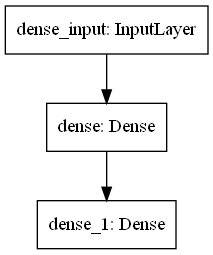

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
num_epochs = 100

training_history = model.fit(x_train,y_train,
epochs= num_epochs,
validation_split = 0.2,
verbose= True)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 4374.7065 - mae: 65.5079 - mse: 4374.7065 - val_loss: 3484.9116 - val_mae: 58.4876 - val_mse: 3484.9116
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 3113.9986 - mae: 55.0769 - mse: 3113.9986 - val_loss: 2128.7473 - val_mae: 45.3492 - val_mse: 2128.7473
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 1810.7235 - mae: 41.5869 - mse: 1810.7235 - val_loss: 1030.9585 - val_mae: 30.9831 - val_mse: 1030.9585
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 827.1240 - mae: 27.4234 - mse: 827.1240 - val_loss: 440.2278 - val_mae: 19.4087 - val_mse: 440.2278
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 346.2474 - mae: 16.7010 - mse: 346.2474 - val_loss: 190.2027 - val_mae: 11.9816 - val_mse: 190.2027
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 151.6545 - mae: 10.5459 - mse: 151.6545 - val_loss

<ipython-input-34-79c932bec67f>:9: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','val')
<ipython-input-34-79c932bec67f>:9: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','val')
<ipython-input-34-79c932bec67f>:9: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','val')


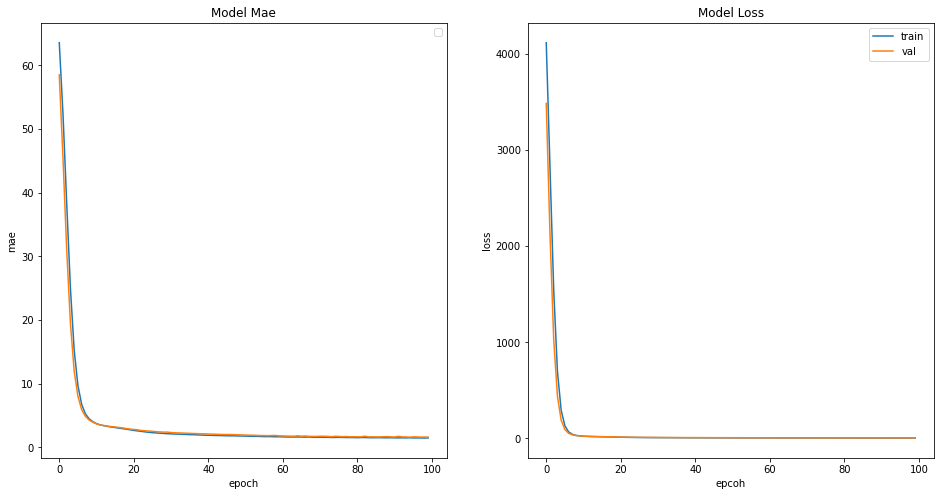

In [ ]:


plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model Mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend('train','val')

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epcoh')
plt.legend(['train','val'])

In [ ]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 923us/step - loss: 6.0704 - mae: 1.7910 - mse: 6.0704


[6.070394515991211, 1.7910014390945435, 6.070394515991211]

In [ ]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9327512727555269

In [ ]:
pred_result = pd.DataFrame({'y_test': y_test.values.flatten(),
'y_pred':y_pred.flatten()}, index= range(len(y_pred)))

pred_result.sample(10)

,y_test,y_pred
157,78.4,78.298424
322,75.2,75.244835
228,69.4,70.790855
278,68.6,72.133888
253,74.1,74.616478
363,67.4,66.508095
392,59.7,59.332378
312,79.6,79.718636
195,72.9,73.562386
370,46.8,47.774147


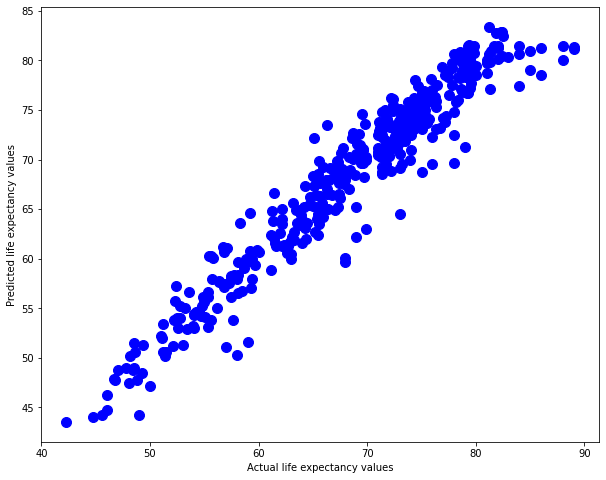

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred, s=100, c='blue')

plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()


In [ ]:
def build_multiple_layer_model():
    model = keras.Sequential([layers.Dense(32,input_shape=(x_train.shape[1],), activation ='relu'),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(4,activation = 'relu'),
    layers.Dense(1)])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mse', metrics = ['mae','mse'],optimizer= optimizer)

    return model

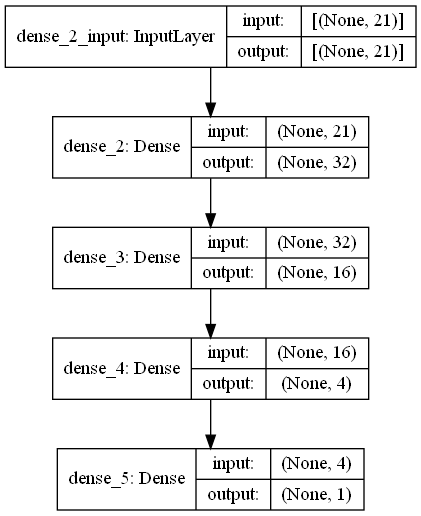

In [ ]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
logdir = os.path.join('seq_logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [ ]:
training_history = model.fit(x_train,y_train,
validation_split=0.2,
epochs=500,
batch_size =100,
callbacks = [tensorboard_callback])

 val_mae: 2.0629 - val_mse: 8.9183
Epoch 380/500
14/14 [==============================] - 0s 3ms/step - loss: 4.7245 - mae: 1.6335 - mse: 4.7245 - val_loss: 8.9540 - val_mae: 2.0668 - val_mse: 8.9540
Epoch 381/500
14/14 [==============================] - 0s 3ms/step - loss: 5.0656 - mae: 1.6796 - mse: 5.0656 - val_loss: 9.0244 - val_mae: 2.0847 - val_mse: 9.0244
Epoch 382/500
14/14 [==============================] - 0s 3ms/step - loss: 5.2766 - mae: 1.7056 - mse: 5.2766 - val_loss: 9.0183 - val_mae: 2.0916 - val_mse: 9.0183
Epoch 383/500
14/14 [==============================] - 0s 3ms/step - loss: 4.6661 - mae: 1.6566 - mse: 4.6661 - val_loss: 9.0522 - val_mae: 2.0948 - val_mse: 9.0522
Epoch 384/500
14/14 [==============================] - 0s 3ms/step - loss: 4.7792 - mae: 1.6551 - mse: 4.7792 - val_loss: 9.0127 - val_mae: 2.0737 - val_mse: 9.0127
Epoch 385/500
14/14 [==============================] - 0s 3ms/step - loss: 5.1747 - mae: 1.7236 - mse: 5.1747 - val_loss: 9.1427 - val_mae: 

In [ ]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 769us/step - loss: 8.4069 - mae: 2.0451 - mse: 8.4069


[8.406867027282715, 2.0451154708862305, 8.406867027282715]

In [ ]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9068674898019936

In [ ]:
def build_model_with_sgd() :
    model = keras.Sequential(
        [layers.Dense(32,input_shape=(x_train.shape[1],), activation='relu'),
        layers.Dense(16,activation ='elu'),
        layers.Dense(4,activation ='elu'),
        layers.Dense(1,activation ='elu')])

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss='mse', metrics = ['mae','mse'], optimizer=optimizer)
    return model

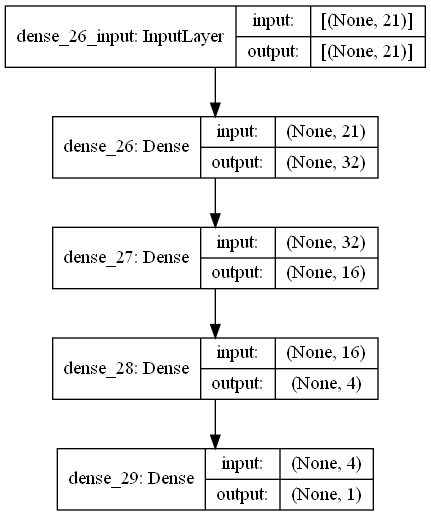

In [ ]:
model_sgd = build_model_with_sgd()
tf.keras.utils.plot_model(model_sgd,show_shapes=True)

In [ ]:
training_history = model_sgd.fit(x_train,y_train,validation_split=0.2,
epochs=100,batch_size=100);

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 3901.0888 - mae: 59.9946 - mse: 3901.0883 - val_loss: 2255.4417 - val_mae: 46.8254 - val_mse: 2255.4417
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 923.7770 - mae: 25.6429 - mse: 923.7770 - val_loss: 145.0106 - val_mae: 11.3398 - val_mse: 145.0106
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 119.9258 - mae: 9.6345 - mse: 119.9258 - val_loss: 43.0558 - val_mae: 5.5799 - val_mse: 43.0558
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 34.1662 - mae: 4.8383 - mse: 34.1662 - val_loss: 16.6299 - val_mae: 3.1249 - val_mse: 16.6299
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 15.7897 - mae: 3.0080 - mse: 15.7897 - val_loss: 16.3947 - val_mae: 3.1024 - val_mse: 16.3947
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 17.0600 - mae: 3.1044 - mse: 17.0600 - val_loss: 14.5959 - val_mae: 2.834

In [ ]:
y_pred = model_sgd.predict(x_test)
r2_score(y_test,y_pred)

0.9281803472696619